In [1]:
model_a_path = '../output/ablation-mnist-models/relu.pkl'
model_b_path = '../output/ablation-mnist-models/relog-elliptical-maxout_4-sigmoid_out-max_fit_l1_1-overlay.pkl'

In [2]:
import sys
sys.path.append('..')

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import torch
import torchvision
import numpy as np
from torch.nn.functional import softmax

In [4]:
model_a = torch.load(model_a_path, map_location=torch.device('cpu'))
model_b = torch.load(model_b_path, map_location=torch.device('cpu'))

In [5]:
dataset = torchvision.datasets.MNIST(
            root='../mnist',
            train=True,
            transform=torchvision.transforms.ToTensor(), 
            download=False,
        )
loader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=False)

In [6]:
x, y = next(iter(loader))

In [11]:
# levels of noise
k = torch.linspace(0, 1, 101).reshape(-1, 1, 1, 1)

class Plotter(object):

    def __init__(self, idx=None):
        idx = idx or np.random.randint(x.shape[0])
        print("Plotting image at index %d" % idx)
        sample1 = x[[idx]]
        sample2 = torch.rand(*sample1.shape)
        self.xs = sample1 * (1-k) + sample2 * k

    def plot_transition(self):
        xs_vals = self.xs.numpy()
        fig, ax = plt.subplots(1, 5, figsize=(20, 4))
        ax[0].imshow(xs_vals[0,0])
        ax[0].set_title('Noise level: 0%')
        ax[1].imshow(xs_vals[25,0])
        ax[1].set_title('Noise level: 25%')
        ax[2].imshow(xs_vals[50,0])
        ax[2].set_title('Noise level: 50%')
        ax[3].imshow(xs_vals[70,0])
        ax[3].set_title('Noise level: 75%')
        ax[4].imshow(xs_vals[100,0])
        ax[4].set_title('Noise level: 100%')

    def plot_predictions(self, model, name):
        model.eval()
        preds, _ = model(self.xs)
        preds = softmax(preds, dim=1)
        pred0 = preds[0].argmax()
        pred_on_noise = preds[-1].clone()
        pred_on_noise[pred0] = -1 # ignore the class we have chosen already
        pred1 = pred_on_noise.argmax()
        k_vals = k.flatten().numpy()
        plt.plot(k_vals, preds[:,pred0].detach().numpy(), label='prediction: %d' %(pred0))
        plt.plot(k_vals, preds[:,pred1].detach().numpy(), label='prediction: %d' %(pred1))
        plt.title('Model: ' + name)
        plt.legend()

In [12]:
p = Plotter(84)

Plotting image at index 84


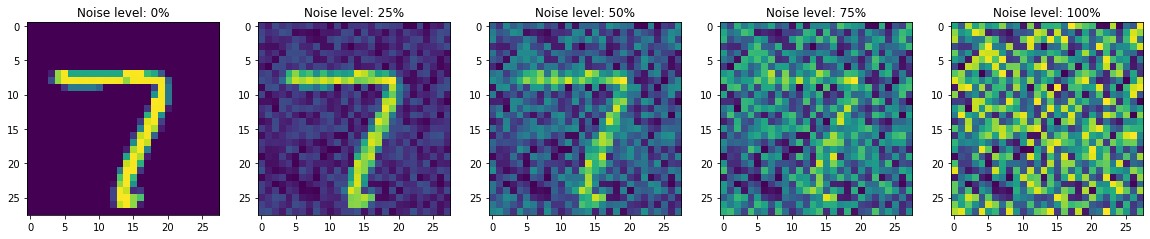

In [13]:
p.plot_transition()

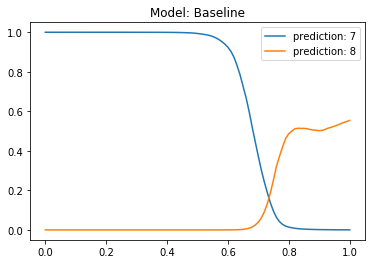

In [14]:
p.plot_predictions(model_a, 'Baseline')

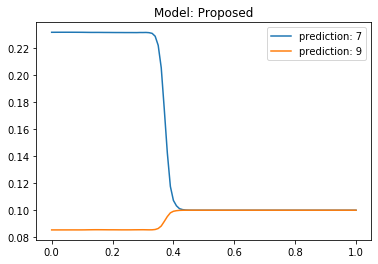

In [15]:
p.plot_predictions(model_b, 'Proposed')

In [43]:
p = Plotter()

Plotting image at index 41


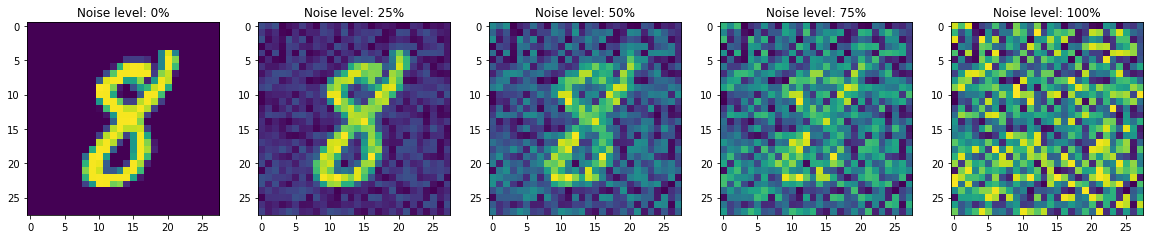

In [44]:
p.plot_transition()

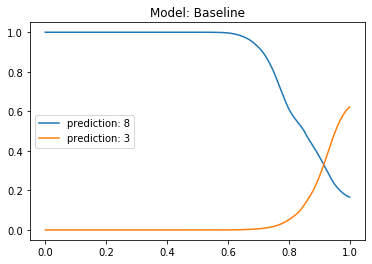

In [45]:
p.plot_predictions(model_a, 'Baseline')

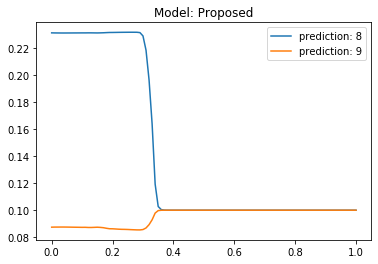

In [46]:
p.plot_predictions(model_b, 'Proposed')

In [25]:
p = Plotter(8)

Plotting image at index 8


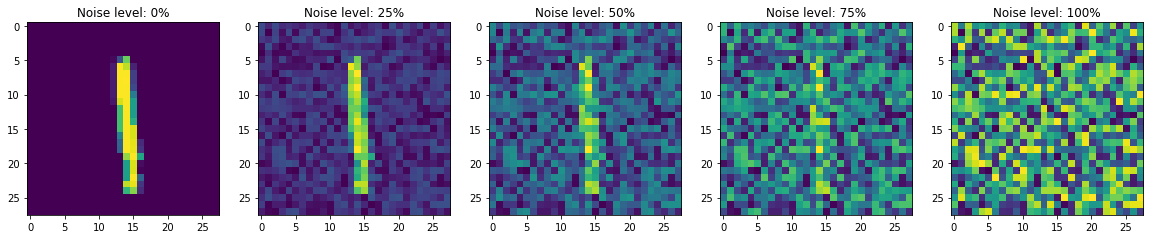

In [26]:
p.plot_transition()

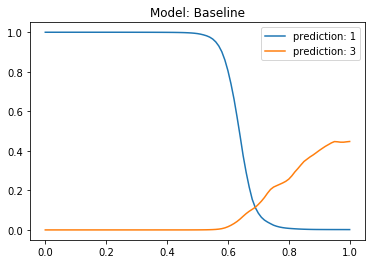

In [27]:
p.plot_predictions(model_a, 'Baseline')

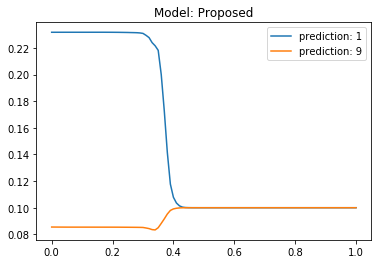

In [28]:
p.plot_predictions(model_b, 'Proposed')

In [29]:
p = Plotter(32)

Plotting image at index 32


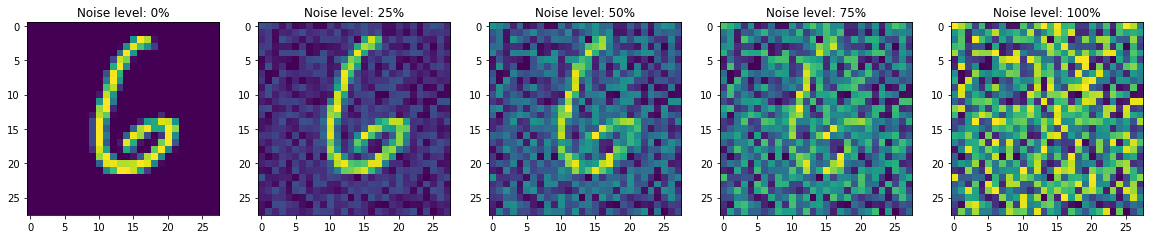

In [30]:
p.plot_transition()

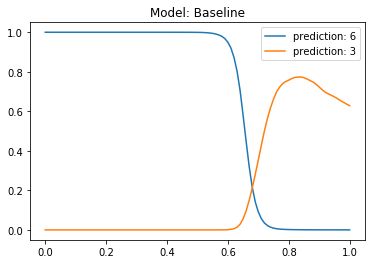

In [31]:
p.plot_predictions(model_a, 'Baseline')

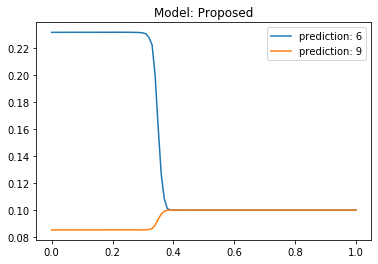

In [32]:
p.plot_predictions(model_b, 'Proposed')